# Dual SVM - Sequential minimal optimization 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:

arr = np.loadtxt("data/SMO_data.csv",
                 delimiter=",", dtype=float)[1:]
X, y = arr[:, 0:2], arr[:, -1]

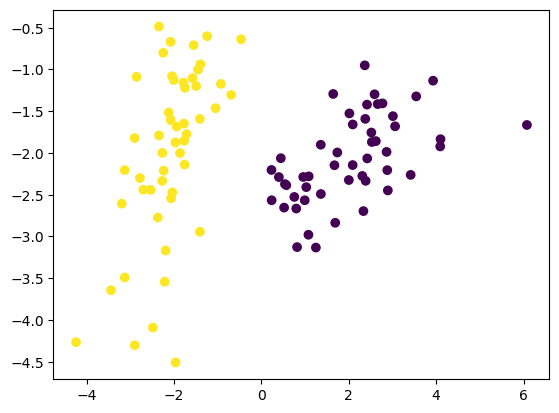

In [17]:
#Let's plot our data
plt.figure()
plt.scatter(X[:, 0:1],X[:, -1], c = y)
plt.show()

In [18]:
class SOM : 
    
    def __init__(self, X, y, Kernel , C , eps):
        self.X = X
        self.y = y
        self.Kernel = Kernel
        self.C = C
        self.eps = eps
        self.H = self.Hes()
        self.alpha = np.zeros((self.y.shape[0],1))  # we initialize alpha to 0
        
        
    def Hes(self):  
        # this function calculates H requiered for our code
        l = self.y.shape[0]
        res = np.zeros((l, l)) # initialize a matrix of zeros
        for i in range(l):
            for j in range(l):
                res[i][j] = self.y[i]*self.y[j]*self.Kernel(self.X[i], self.X[j])
        return res
    
    
    def grad_cost(self):
        # function to calculate the gradient of the cost function
        e= np.ones((self.alpha.shape[0],1))
        return np.dot(self.H, self.alpha) - e

    
    # this function is to select two point of our working set, and returns the indexes of them
    def select_working_set(self):

        grad = self.grad_cost() 

        l = self.alpha.shape[0]

        # let's construct I_up and I_low :

        I_up, I_low = [], []
        for t in range(l):
            if y[t] == 1 :
                if self.alpha[t] < self.C : 
                    I_up.append(t)
                if self.alpha[t] > 0 :
                    I_low.append(t)        
            else :
                if self.alpha[t] < self.C : 
                    I_low.append(t)
                if self.alpha[t] > 0 :
                    I_up.append(t)

        # lets now get the indexes of the working set, in this case of decomposing we chose 2 points 

        i = I_up[np.argmax([-self.y[t] * grad[t]  for t in I_up])]
        j = I_low[np.argmin([-self.y[t] * grad[t]  for t in I_low])]   

        B = [i, j] # B is our working set


        # N : has all the remaining indexes taht dont belong to the working set 
        N = []
        for item in list(range(l)): 
            if item not in B :
                N.append(item)
        N = np.array(N)

        return B, N
    
    def solve_problem(self, B, N):
    
        # this function gives the optimal solutions for the working set problem
        al = self.alpha.flatten()    

        B1 , B2 = 0, 0
        for i in N :
            B1+= self.y[i]*al[i]*self.Kernel(self.X[i],self.X[B[0]])
            B2+= self.y[i]*al[i]*self.Kernel(self.X[i],self.X[B[1]])


        #print(B1, B2)
        if self.y[B[0]] != self.y[B[1]]:
            U = max(0, al[B[1]] - al[B[0]])
            V = min(self.C, self.C + al[B[1]] - al[B[0]])
        else :
            U = max(0, al[B[1]] + al[B[0]] - self.C)
            V = min(self.C, al[B[1]] + al[B[0]])


        B11 = self.Kernel(self.X[B[0]],self.X[B[0]])
        B22 = self.Kernel(self.X[B[1]],self.X[B[1]])
        B12 = self.Kernel(self.X[B[0]],self.X[B[1]])
        B21 = self.Kernel(self.X[B[1]],self.X[B[0]])

        E= B1-B2 + al[B[0]]*self.y[B[0]] * (B11 - B12) + al[B[1]]*self.y[B[1]] * (B21 - B22) - self.y[B[0]] + self.y[B[1]]
        p = B11 + B22 - 2 * B12
        #print(E, p)


        a2_tmp = al[B[1]] + (self.y[B[1]][0] * E) / p

        #print(a2_tmp)

        a2 = a2_tmp

        if a2_tmp > V :
            a2 = V
        elif a2_tmp >= U and a2_tmp <= V :
            a2 = a2_tmp
        else : 
            a2 = U

        a1 = al[B[0]] + self.y[B[0]][0]*self.y[B[1]][0]*(al[B[1]] - a2)
        # a1 and a2 are the optimal solutions for our subproblem on the working set B
        res = [a1, a2]

        return res
    
    
    
    def criteria_2(self, a):
    
        grad = self.grad_cost(a)

        # let's construct I_up and I_low :

        I_up, I_low = [], []
        for t in range(len(a)):
            if y[t] == 1 :
                if a[t] < self.C : 
                    I_up.append(t)
                if a[t] > 0 :
                    I_low.append(t)        
            else :
                if a[t] < self.C : 
                    I_low.append(t)
                if a[t] > 0 :
                    I_up.append(t)

        # we now calculate m(alpha) and M(alpha)

        m_alpha = max([-self.y[t] * grad[t]  for t in I_up])
        M_alpha = min([-self.y[t] * grad[t]  for t in I_low])

        diff = m_alpha - M_alpha

        if diff < this.eps  : # we check for the convergence 
            return True


        return False
    
    
    def SMO(self):
        l = self.X.shape[0]
        while(not criteria_2(self.H, self.alpha)): # since criteria_2 returns False if verified 
            B , N = self.select_working_set(self.alpha) # we compute the working set B
            res = solve_problem(self.alpha,B, N) # res is a list with the optimal solution on the working set
            self.alpha[B[0]],self.alpha[B[1]] = res[0], res[1] # we update alpha in the indexes that are in working set
        return self.alpha
    
    
        
        

In [6]:
# reshape our label to size(data_lenght, 1)
Y = np.copy(y)
Y = np.reshape(Y, (len(Y), 1))

In [7]:
# we transform our labels from (0, 1) to (-1, 1)
for i in range(len(Y)) :
    if Y[i] == 0 :
        Y[i] = -1

In [8]:
# our linear kernel function 
def linear_kernel(aa, bb): 
    suum = 0
    for k in range(len(aa)):
        suum += aa[k]*bb[k]  
    return suum

In [1]:
def H(x, y, K):  
    # this function calculates H requiered for our code
    l = y.shape[0]
    res = np.zeros((l, l)) # initialize a matrix of zeros
    for i in range(l):
        for j in range(l):
            res[i][j] = y[i]*y[j]*K(x[i], x[j])
    return res

In [10]:
def cost_function(alpha, x, y):
    # we define our dual problem cost function
    l = x.shape[0]
    e = np.ones((l,1))    
    return (1/2)*np.linalg.multi_dot([alpha.T,H(x, y, K), alpha]) - np.dot(e.T, alpha)

In [11]:
# problem : dont know how to get the lagrangian multiplier
def criteria_1(H , alpha , x, y, C, b, eps, acc):
        
    '''
    b : lagrangian multiplier
    eps : accuracy for constraint : yT.alpha = 0
    acc : accuracy for alpha[j] = 0 
     
    '''

    if np.dot(y.T,alpha) > eps: # we check the first stopping condition
        return False
    
    print("first condition verified")
    
    for j in range(l): 
        # we use a boolean variable to check if any of the conditions are verified
        tmp_flag = False
        summ = 0 
        for i in range(l):
            summ += alpha[i]*H[i,j] + b*y[j]
        
        if alpha[j] < acc :     
            if summ >= 1 :
                tmp_flag = True
            
        elif alpha[j] > 0 and alpha[j] < C - acc : 
            if summ == 1 :
                tmp_flag = True
        elif alpha[j] == C or alpha[j] > C - acc: 
            if summ <= 1 :
                tmp_flag = True
        
        if not tmp_flag : # if the condition is not verified for a single element of alpha, we exit the loop
            return False
    
    print("second condition verified")

    return True # we return true if all the stopping conditions are verified

In [12]:
def criteria_2(H, a ,x, y, C, eps):
    
    grad = grad_cost(H, a)
    
    # let's construct I_up and I_low :
    
    I_up, I_low = [], []
    for t in range(len(a)):
        if y[t] == 1 :
            if a[t] < C : 
                I_up.append(t)
            if a[t] > 0 :
                I_low.append(t)        
        else :
            if a[t] < C : 
                I_low.append(t)
            if a[t] > 0 :
                I_up.append(t)
    
    
    # we now calculate m(alpha) and M(alpha)
    
    m_alpha = max([-y[t] * grad[t]  for t in I_up])
    M_alpha = min([-y[t] * grad[t]  for t in I_low])
    
    diff = m_alpha - M_alpha

    if diff < eps  : # we check for the convergence 
        return True
    
    
    return False

In [13]:
def grad_cost(H, Z):
    # function to calculate the gradient of the cost function
    e= np.ones((Z.shape[0],1))
    return np.dot(H, Z) - e

In [14]:
# this function is to select two point of our working set, and returns the indexes of them
def select_working_set(Hess,x, y, alp, C):
    
    grad = grad_cost(Hess, alp) 
    
    l = alp.shape[0]
    
    # let's construct I_up and I_low :
    
    I_up, I_low = [], []
    for t in range(alp.shape[0]):
        if y[t] == 1 :
            if alp[t] < C : 
                I_up.append(t)
            if alp[t] > 0 :
                I_low.append(t)        
        else :
            if alp[t] < C : 
                I_low.append(t)
            if alp[t] > 0 :
                I_up.append(t)
    
    # lets now get the indexes of the working set, in this case of decomposing we chose 2 points 
    
    i = I_up[np.argmax([-y[t] * grad[t]  for t in I_up])]
    j = I_low[np.argmin([-y[t] * grad[t]  for t in I_low])]   

    B = [i, j] # B is our working set
    
    
    # N : has all the remaining indexes taht dont belong to the working set 
    N = []
    for item in list(range(l)): 
        if item not in B :
            N.append(item)
    N = np.array(N)
    
    return B, N
    

In [15]:
# an adaptation of the previous cost funciton in case we are decomposing the dataset
def decomposition_cost_function(alpha,B):
    '''
    B : indexes of the subset of data
    
    '''
    l = alpha.shape[0]
    N = []
    for item in list(range(l)): 
        if item not in B :
            N.append(item)
    N = np.array(N)
    
    e = np.ones((l, 1))
    
    dot = (1/2)*np.linalg.multi_dot([alpha[B].T,H[B][:, B], alpha[B]]) - np.dot(alpha[B].T,(e - np.dot(H[B][:, N], alpha[N])))
    
    return dot 

In [16]:
def solve_problem(x, y,alphaa, K, B, N, C):
    
    # this function gives the optimal solutions for the working set problem
    
    al = alphaa.flatten()    
    
    B1 , B2 = 0, 0
    for i in N :
        B1+= y[i]*al[i]*K(x[i],x[B[0]])
        B2+= y[i]*al[i]*K(x[i],x[B[1]])
    
    
    #print(B1, B2)
    if y[B[0]] != y[B[1]]:
        U = max(0, al[B[1]] - al[B[0]])
        V = min(C, C + al[B[1]] - al[B[0]])
    else :
        U = max(0, al[B[1]] + al[B[0]] - C)
        V = min(C, al[B[1]] + al[B[0]])
    
    
    B11 = K(x[B[0]],x[B[0]])
    B22 = K(x[B[1]],x[B[1]])
    B12 = K(x[B[0]],x[B[1]])
    B21 = K(x[B[1]],x[B[0]])
    
    E= B1-B2 + al[B[0]]*y[B[0]] * (B11 - B12) + al[B[1]]*y[B[1]] * (B21 - B22) - y[B[0]] + y[B[1]]
    p = B11 + B22 - 2 * B12
    #print(E, p)

    
    a2_tmp = al[B[1]] + (y[B[1]][0] * E) / p
    
    #print(a2_tmp)
    
    a2 = a2_tmp
    
    if a2_tmp > V :
        a2 = V
    elif a2_tmp >= U and a2_tmp <= V :
        a2 = a2_tmp
    else : 
        a2 = U
        

    a1 = al[B[0]] + y[B[0]][0]*y[B[1]][0]*(al[B[1]] - a2)
    
    # a1 and a2 are the optimal solutions for our subproblem on the working set B
    
    res = [a1, a2]
    
    return res

In [17]:
def SMO(x, y, K, C, eps):
    l = x.shape[0]
    alpha = np.zeros((l,1))  # we initialize alpha to 0
    He = H(x, y, K) # we calculate H
    while(not criteria_2(He, alpha ,x, y, C, eps)): # since criteria_2 returns False if verified 
        B , N= select_working_set(He,x, y, alpha, C) # we compute the working set B
        res = solve_problem(x, y, alpha,K, B, N, C) # res is a list with the optimal solution on the working set
        alpha[B[0]],alpha[B[1]] = res[0], res[1] # we update alpha in the indexes that are in working set
    return alpha

In [18]:
# we solve the problem with : 
# kernel : linear_kernel
# C  = 10 
# eps : 0.01 (accuracy)

alpha = SMO(X, Y ,linear_kernel,100,0.01)

In [22]:
def support_vectors(alpha): 
    # the support vector points correspond to non zeros so we get the indexes of them
    sv_mask = np.where(alpha != 0.0)[0] 
    support_vectors = X[sv_mask] # the support vectors
    plt.scatter(X[:, 0], X[:, 1], c=y)
    # we now select the support vectors circled with red
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', edgecolors='r')
    return

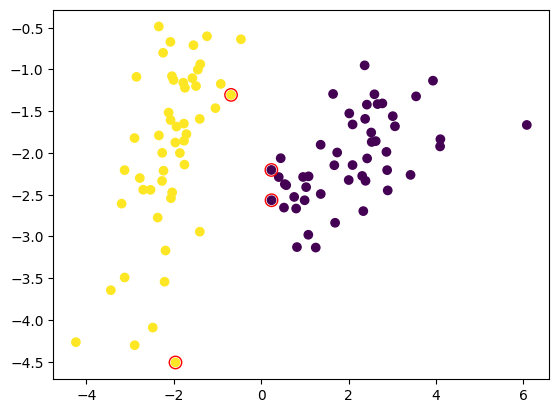

In [23]:
support_vectors(alpha)